# Heart Disease Dataset

**Summary**

With millions of people suffering from heart disease, a number of studies have attempted to predict whether a person is at risk of having heart disease or not through machine learning techniques. The obtained accuracy in the studies also shows the potential of applying such techniques to the medical field since it could be beneficial in initial diagnosis. With this particular dataset, **the objective is to use the features given in the dataset to classify whether a person has heart disease**. To do so, 4 classification models are developed including, Logistic Regression, Random Forest, Gradient Boosting and Neural Network. The result of these algorithms shows an acceptable accuracy approximately 80% - 90%. It is believed that with additional research and more data, these model would achieve higher accuracy. Although, this may not be accurate enough for the medical industry to trust the algorithm in deciding if a person has disease, it would be enough to utilize as a support system assisting professional in the field to initially diagnose diseases. The best model with 90% accuracy is gradient boosting. It shows that the top 5 factors that contributes the cause of heart disease are, the chest pain experienced, the maximum heart rate achieved, the number of major vessle colored by flourosopy, thalassemia and ST depression induced by exercise.

## Introduction
Heart Disease has been a prominent disease taking people lives across the globe. The World Health Organization has estimated that globally 17 million people die because of cardiovascular disease every year, specifically heart attacks and strokes (WHO,2019). A number of factors can contribute to the cause of the disease, for example family history, blood pressure, physical activities, age, sex, lifestyle, and alcohol intake. These are just a few of the factors, there are a lot more to consider. Thus, it comes the challenge to initially determine wheter a person is at risk of having a heart disease. With the ability to diagnose heart disease early and provide the right treatment, a lot of lives could be saved. Fortunately, the application of machine learning has given the ability to predict the outcomes based on given input data. In another word, one could develop a machine learning diagnosis system to initially assist in detecting heart disease.  


In [3]:
pip install tensorflow

  Stored in directory: C:\Users\dsouz\AppData\Local\pip\Cache\wheels\b1\c2\ed\d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
Successfully built wrapt
  Found existing installation: tensorboard 2.0.0
    Uninstalling tensorboard-2.0.0:
      Successfully uninstalled tensorboard-2.0.0
  Found existing installation: wrapt 1.10.11
Note: you may need to restart the kernel to use updated packages.


ERROR: fastai 1.0.34 requires torchvision-nightly, which is not installed.
ERROR: thinc 6.12.0 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.12.1 which is incompatible.
ERROR: tensorboard 2.1.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.24.1 which is incompatible.
ERROR: spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.8.29 which is incompatible.
ERROR: Cannot uninstall 'wrapt'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, recall_score
, roc_auc_score, roc_curve,classification_report)

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam



Using TensorFlow backend.


# Data Extraction
The datasets are retrieved from UCI repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). They are from 4 different database which are Cleveland, Hungary, Switzerland and the VA Long Beach. The original file has 75 attributes, however all published research refer to use only 14 attributes and mainly from the Cleveland database. Based on the published reseaches, most of them focuses on classifying the presence and absence of heart disease. In this assignment, we have initially decided to start with the data from all 4 databases.

In [6]:
# Cleveland
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
                 , header=None, na_values = ['?','',' ','NaN'])
# Hungarian
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
                  , header=None, na_values = ['?','',' ','NaN'])
# Switzerland
df2= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
                 , header=None, na_values = ['?','',' ','NaN'])
# VA Long Beach
df3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'
                  , header=None, na_values = ['?','',' ','NaN'])

# Merge the files into one table
heartdisease = pd.concat([df,df1,df2,df3])

## Data Description

In [7]:
# Name the header, the header order is given in UCI repository
header =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
heartdisease.columns = header
# Check shape of the data
print('The shape of the data is :',heartdisease.shape)
# Display a chunk of data
heartdisease.head()

The shape of the data is : (920, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


These are the description of the columns specified in UCI repository

- <b>age</b>: Age of a person
- <b>sex</b>: 0 = female, 1 = male
- <b>cp</b>: chest pain experienced, 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
- <b>trestbps</b>: resting blood measure (mm Hg on admission to the hospital)
- <b>chol</b>: cholesterol measurement in mg/dl
- <b>fbs</b>: fasting blood sugar (>120 mg/dl, 1 = true, 0 = false)
- <b>restecg</b>: Resting electro cardiographic measurement (0 = normal, 1 =having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes'criteria.
- <b>thalach</b>: maximum heart rate achieved
- <b>exang</b>: exercise iduced angina (1 = yes, 0 = no)
- <b>oldpeak</b>: ST depression induced by exercise relative to rest (relates to positions on the ECG plot)
- <b>slope</b>: slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- <b>ca</b>: the number of major vessels (0-3) colored by flourosopy
- <b>thal</b>: thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
- <b>target</b>: Heart disease (1,2,3,4 = distinguish presence, 0 = absence)

**Goal**: Attempt to distinguish presence of heart disease in the target column

# Data Cleaning

## Missing Values

In [8]:
# Check missing values and shape of the data
heartdisease.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

**Observation:**  There are 920 rows with 14 columns. It is observed that there are some columns having missing value more than 50 percent of the dataset. However, dropping the columns is not considered as based on literatured review, these columns do have influences over the risk of having heart disease. Thus, the row that contains missing value will be dropped instead.

**Check the datatype and statistics summary of the dataset**

In [9]:
# Check data type
print(heartdisease.info())
# Get statistic summary
print(round(heartdisease.describe(),2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
age         920 non-null float64
sex         920 non-null float64
cp          920 non-null float64
trestbps    861 non-null float64
chol        890 non-null float64
fbs         830 non-null float64
restecg     918 non-null float64
thalach     865 non-null float64
exang       865 non-null float64
oldpeak     858 non-null float64
slope       611 non-null float64
ca          309 non-null float64
thal        434 non-null float64
target      920 non-null int64
dtypes: float64(13), int64(1)
memory usage: 107.8 KB
None
          age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  920.00  920.00  920.00    861.00  890.00  830.00   918.00   865.00   
mean    53.51    0.79    3.25    132.13  199.13    0.17     0.60   137.55   
std      9.42    0.41    0.93     19.07  110.78    0.37     0.81    25.93   
min     28.00    0.00    1.00      0.00    0.00    0.00     0.00    6

**Observation:** The data in each columns is in numeric format. The following columns are the columns that have categorical value where each number represents a category.<br>
- sex, cp, fbs, exang, ca, thal, slope ,target

**Dropping rows that contains missing values**

In [10]:
heartdisease.dropna(inplace=True)
heartdisease.astype({'age':'int',
                     'sex':'int',
                     'cp':'int',
                     'trestbps':'int',
                     'chol':'int',
                     'fbs':'int',
                     'restecg':'int',
                     'thalach':'int',
                     'exang':'int',
                     'oldpeak':'int',
                     'slope':'int',
                     'ca':'int',
                     'thal':'int',
                     'target':'int'                
})
heartdisease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Transformation

As the target column is the desired output. It is beneficial to see how the given output is distributed.

0    160
1     56
3     35
2     35
4     13
Name: target, dtype: int64


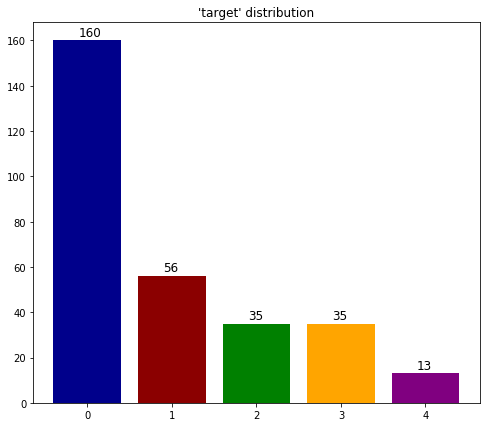

In [11]:
print(heartdisease['target'].value_counts())
fig = plt.figure(figsize=(8,7))
plt.bar(np.arange(5), height=heartdisease['target'].value_counts().sort_index(),color = ['darkblue','darkred','green'
                                                                                         ,'orange','purple'])
plt.title("'target' distribution")

tlabel = list(heartdisease['target'].value_counts())
for i in range(5):
    plt.text(x = i-0.1 , y =tlabel[i] +2 , s = tlabel[i], size = 12)

Based on target distribution, the classes in target column are not proportionally distributed. This will result in bad prediction on the class that has only a few observation, for instance class 4. To deal with this problem, we have decided to transform the target classes into only 0 and 1, where 0 represents the absence of heart disease and 1 represents the presence of heart disease.

**Convert target = 1,2,3,4 to 1**

In [12]:
# Convert anything that is not 0 to 1
heartdisease.loc[heartdisease['target']!=0,'target'] = 1

0    160
1    139
Name: target, dtype: int64


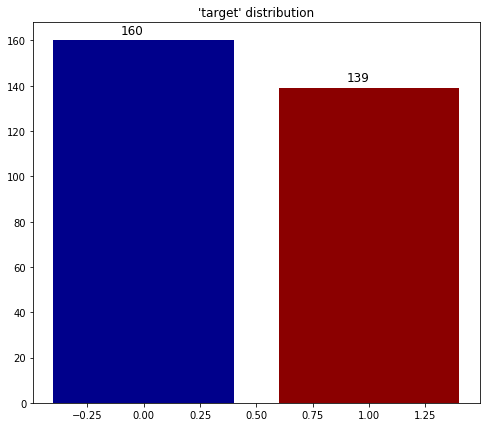

In [13]:
# Check the distribution
print(heartdisease['target'].value_counts().sort_index())
fig = plt.figure(figsize=(8,7))
plt.bar(np.arange(2), height=heartdisease['target'].value_counts().sort_index(),color = ['darkblue','darkred'])
plt.title("'target' distribution")

tlabel = list(heartdisease['target'].value_counts().sort_index())
for i in range(2):
    plt.text(x = i-0.1 , y =tlabel[i] +3 , s = tlabel[i], size = 12)

After the target is transformed and missing values are dropped, the distribution in the target is closer to proportional.

# Data Exploration

## Correlation

First, the correlation is checked to see how each attributes potentially causes heart disease

In [14]:
# Create a correlation matrix to initially see how the columns are related to target
corrmat = heartdisease.corr()
corrmat['target'].sort_values(ascending = False)

target      1.000000
thal        0.530603
ca          0.455398
exang       0.427123
oldpeak     0.424947
cp          0.412597
slope       0.335926
sex         0.281912
age         0.223498
restecg     0.157941
trestbps    0.153849
chol        0.067350
fbs         0.000192
thalach    -0.430108
Name: target, dtype: float64

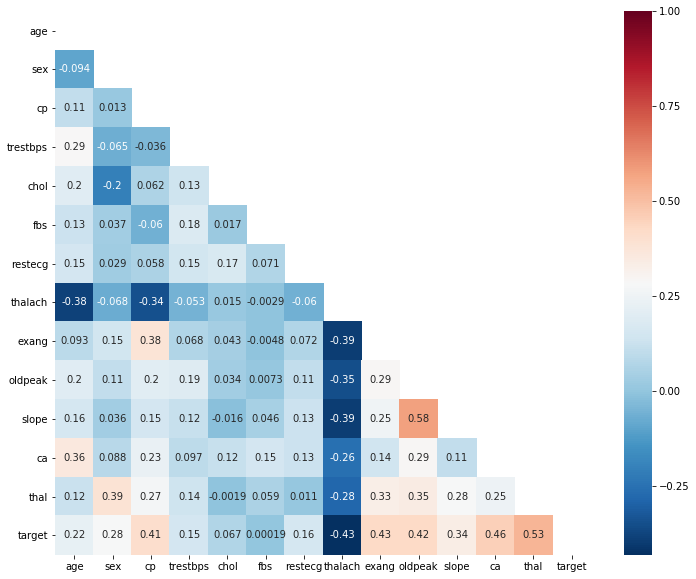

In [15]:
# Plotting the correlation to help visulize by coloring
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
# graph correlation plot
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, mask = mask , annot=True, cmap='RdBu_r')

**Observation:** While a number of factors has coefficient around 0.3 to 0.5. Below are the factors that tend to have less influence on heart disease
- age, sex, trestbps, chol, fbs, restecg

## Distribution

Next, the distribution of the attributes are checked. The distribution of each column is plotted grouped by target. This is to see if those with heart disease and those without heart disease have some characteristic within the features, for example men tends to have higher chance of having heart disease. Those with numerical categories are plotted using 100% stacked bar where within each group the data is grouped by target.

C:\Users\dsouz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


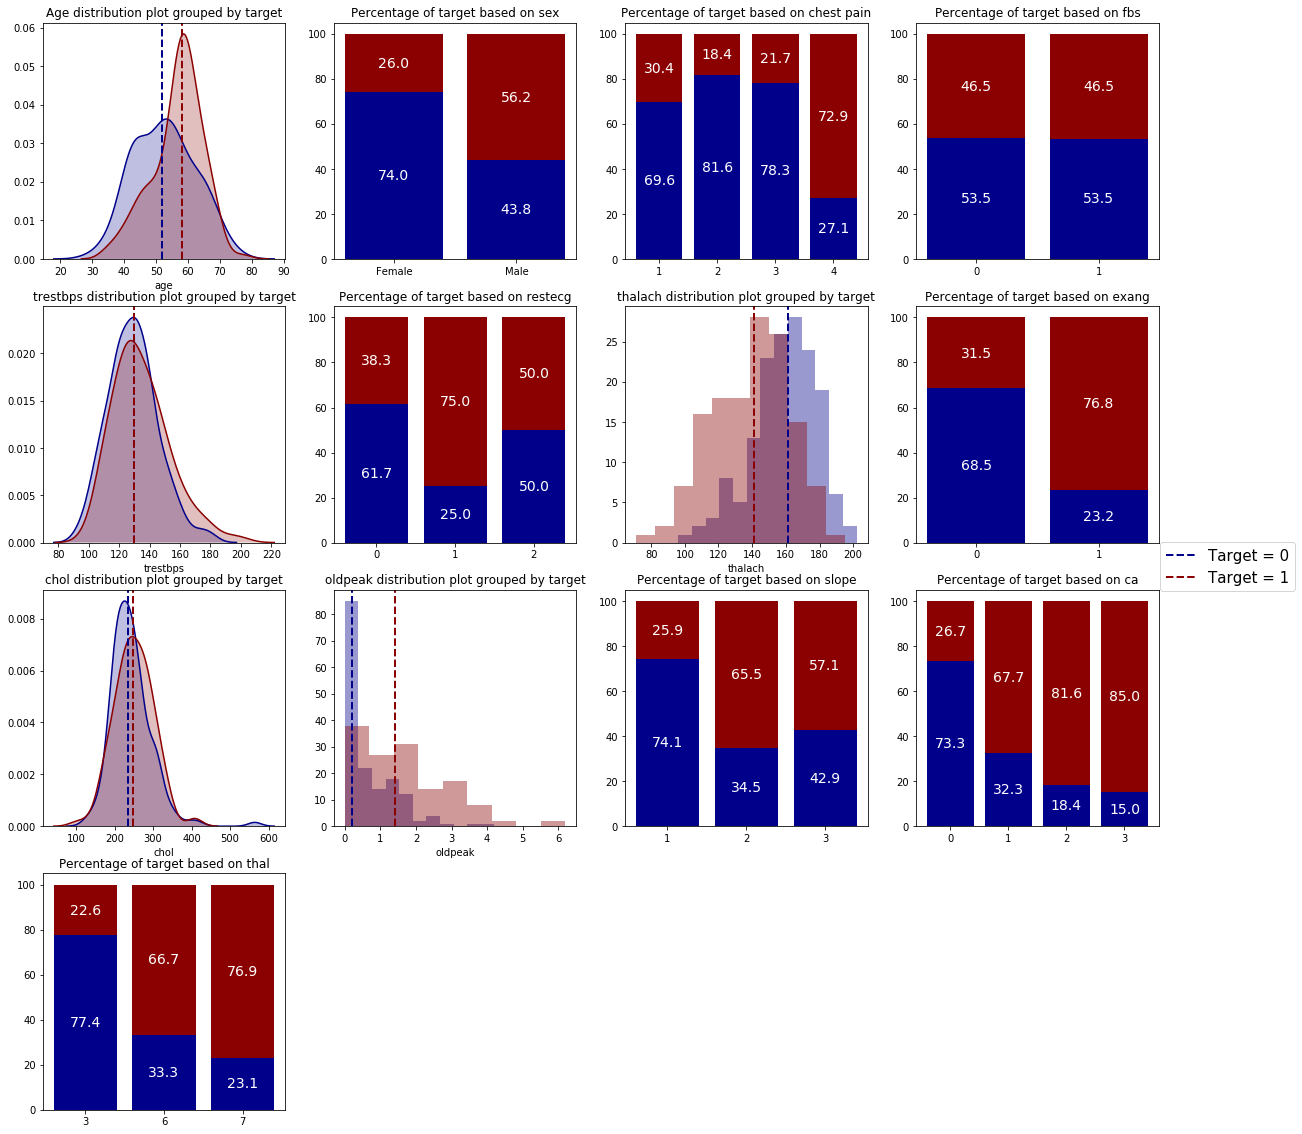

In [16]:
fig = plt.figure(figsize=(20,20))
# Age
ax1 = fig.add_subplot(4,4,1)
sns.distplot(heartdisease[heartdisease['target']==0]['age'], hist = False, kde=True
             , kde_kws = {'shade': True}, color='darkblue')
sns.distplot(heartdisease[heartdisease['target']!=0]['age'], hist = False, kde=True
             , kde_kws = {'shade': True}, color='darkred')
plt.axvline(heartdisease[heartdisease['target']==0]['age'].median(), color='darkblue'
            , linestyle='dashed', linewidth=2)
plt.axvline(heartdisease[heartdisease['target']!=0]['age'].median(), color='darkred'
            , linestyle='dashed', linewidth=2)
plt.title('Age distribution plot grouped by target')

# Sex
ax2 = fig.add_subplot(4,4,2)
target0 = np.array([heartdisease.groupby(['sex'])['target'].value_counts().sort_index()[0][0]
                    , heartdisease.groupby(['sex'])['target'].value_counts().sort_index()[1][0]])
target1 = np.array([heartdisease.groupby(['sex'])['target'].value_counts().sort_index()[0][1]
                    , heartdisease.groupby(['sex'])['target'].value_counts().sort_index()[1][1]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax2.bar(['Female','Male'],target0, label= 'target=0', color='darkblue')
ax2.bar(['Female','Male'],target1, bottom = target0,label= 'target=1',color='darkred')

for xpos, ypos, yval in zip(['Female','Male'], target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)
for xpos, ypos, yval in zip(['Female','Male'], target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)
plt.title('Percentage of target based on sex')

# Chest Pain
ax3 = fig.add_subplot(4,4,3)
target0 = np.array([heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[1][0]
                    ,heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[2][0],
                   heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[3][0]
                    , heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[4][0]])
target1 = np.array([heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[1][1]
                    ,heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[2][1],
                   heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[3][1]
                    , heartdisease.groupby(['cp'])['target'].value_counts().sort_index()[4][1]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax3.bar([1,2,3,4],target0, label= 'target=0', color='darkblue')
ax3.bar([1,2,3,4],target1, bottom = target0,label= 'target=1',color='darkred')
plt.title('Percentage of target based on chest pain')

for xpos, ypos, yval in zip([1,2,3,4], target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

for xpos, ypos, yval in zip([1,2,3,4], target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

# Resting blood pressure
ax4 = fig.add_subplot(4,4,5)
sns.distplot(heartdisease[heartdisease['target']==0]['trestbps'], hist = False, kde=True
             , kde_kws = {'shade': True}, color='darkblue')
sns.distplot(heartdisease[heartdisease['target']!=0]['trestbps'], hist = False, kde=True
             , kde_kws = {'shade': True}, color='darkred')

plt.axvline(heartdisease[heartdisease['target']==0]['trestbps'].median(), color='darkblue', linestyle='dashed'
            , linewidth=2)
plt.axvline(heartdisease[heartdisease['target']!=0]['trestbps'].median(), color='darkred', linestyle='dashed'
            , linewidth=2)

plt.title('trestbps distribution plot grouped by target')

#fbs
ax6 = fig.add_subplot(4,4,4)
target0 = np.array([heartdisease.groupby(['fbs'])['target'].value_counts().sort_index()[0][0]
                    , heartdisease.groupby(['fbs'])['target'].value_counts().sort_index()[1][0]])
target1 = np.array([heartdisease.groupby(['fbs'])['target'].value_counts().sort_index()[0][1]
                    , heartdisease.groupby(['fbs'])['target'].value_counts().sort_index()[1][1]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax6.bar(['0','1'],target0, label= 'target=0', color='darkblue')
ax6.bar(['0','1'],target1, bottom = target0,label= 'target=1',color='darkred')

for xpos, ypos, yval in zip(np.arange(2), target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

for xpos, ypos, yval in zip(np.arange(2), target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)
plt.title('Percentage of target based on fbs')

#restecg
ax7 = fig.add_subplot(4,4,6)
target0 = np.array([heartdisease.groupby(['restecg'])['target'].value_counts().sort_index()[0][0]
                    , heartdisease.groupby(['restecg'])['target'].value_counts().sort_index()[1][0],
                    heartdisease.groupby(['restecg'])['target'].value_counts().sort_index()[2][0]])
target1 = np.array([heartdisease.groupby(['restecg'])['target'].value_counts().sort_index()[0][1]
                    , heartdisease.groupby(['restecg'])['target'].value_counts().sort_index()[1][1],
                   heartdisease.groupby(['restecg'])['target'].value_counts().sort_index()[2][0]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax7.bar(['0','1','2'],target0, label= 'target=0', color='darkblue')
ax7.bar(['0','1','2'],target1, bottom = target0,label= 'target=1',color='darkred')
for xpos, ypos, yval in zip(['0','1','2'], target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

for xpos, ypos, yval in zip(['0','1','2'], target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

plt.title('Percentage of target based on restecg')

# thalach
ax8 = fig.add_subplot(4,4,7)
sns.distplot(heartdisease[heartdisease['target']==0]['thalach'], hist = True, kde=False
             , kde_kws = {'shade': True}, color='darkblue')
sns.distplot(heartdisease[heartdisease['target']!=0]['thalach'], hist = True, kde=False
             , kde_kws = {'shade': True}, color='darkred')

plt.axvline(heartdisease[heartdisease['target']==0]['thalach'].median(), color='darkblue', linestyle='dashed'
            , linewidth=2)
plt.axvline(heartdisease[heartdisease['target']!=0]['thalach'].median(), color='darkred', linestyle='dashed'
            , linewidth=2)
plt.title('thalach distribution plot grouped by target')

#exang
ax8 = fig.add_subplot(4,4,8)
target0 = np.array([heartdisease.groupby(['exang'])['target'].value_counts().sort_index()[0][0]
                    , heartdisease.groupby(['exang'])['target'].value_counts().sort_index()[1][0]])
target1 = np.array([heartdisease.groupby(['exang'])['target'].value_counts().sort_index()[0][1]
                    , heartdisease.groupby(['exang'])['target'].value_counts().sort_index()[1][1]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax8.bar(['0','1'],target0, label= 'target=0', color='darkblue')
ax8.bar(['0','1'],target1, bottom = target0,label= 'target=1',color='darkred')
for xpos, ypos, yval in zip(['0','1'], target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

for xpos, ypos, yval in zip(['0','1'], target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

plt.title('Percentage of target based on exang')

#chol
ax9 = fig.add_subplot(4,4,9)
sns.distplot(heartdisease[heartdisease['target']==0]['chol'], hist = False, kde=True
             , kde_kws = {'shade': True}, color='darkblue')
sns.distplot(heartdisease[heartdisease['target']!=0]['chol'], hist = False, kde=True
             , kde_kws = {'shade': True}, color='darkred')

plt.axvline(heartdisease[heartdisease['target']==0]['chol'].median(), color='darkblue', linestyle='dashed'
            , linewidth=2)
plt.axvline(heartdisease[heartdisease['target']!=0]['chol'].median(), color='darkred', linestyle='dashed'
            , linewidth=2)
plt.title('chol distribution plot grouped by target')


# oldpeak
ax8 = fig.add_subplot(4,4,10)
sns.distplot(heartdisease[heartdisease['target']==0]['oldpeak'], hist = True, kde=False
             , kde_kws = {'shade': True}, color='darkblue')
sns.distplot(heartdisease[heartdisease['target']!=0]['oldpeak'], hist = True, kde=False
             , kde_kws = {'shade': True}, color='darkred')

plt.axvline(heartdisease[heartdisease['target']==0]['oldpeak'].median(), color='darkblue', linestyle='dashed'
            , linewidth=2)
plt.axvline(heartdisease[heartdisease['target']!=0]['oldpeak'].median(), color='darkred', linestyle='dashed'
            , linewidth=2)
plt.title('oldpeak distribution plot grouped by target')

# slope
ax9 = fig.add_subplot(4,4,11)
target0 = np.array([heartdisease.groupby(['slope'])['target'].value_counts().sort_index()[1][0]
                    , heartdisease.groupby(['slope'])['target'].value_counts().sort_index()[2][0],
                   heartdisease.groupby(['slope'])['target'].value_counts().sort_index()[3][0]])
target1 = np.array([heartdisease.groupby(['slope'])['target'].value_counts().sort_index()[1][1]
                    , heartdisease.groupby(['slope'])['target'].value_counts().sort_index()[2][1],
                    heartdisease.groupby(['slope'])['target'].value_counts().sort_index()[3][1]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax9.bar(['1','2','3'],target0, label= 'target=0', color='darkblue')
ax9.bar(['1','2','3'],target1, bottom = target0,label= 'target=1',color='darkred')
for xpos, ypos, yval in zip(['1','2','3'], target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

for xpos, ypos, yval in zip(['1','2','3'], target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

plt.title('Percentage of target based on slope')

# ca
ax10 = fig.add_subplot(4,4,12)
target0 = np.array([heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[0][0]
                    , heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[1][0],
                   heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[2][0]
                    ,heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[3][0]])
target1 = np.array([heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[0][1]
                    , heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[1][1],
                   heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[2][1]
                    ,heartdisease.groupby(['ca'])['target'].value_counts().sort_index()[3][1]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax10.bar(np.arange(4),target0, label= 'target=0', color='darkblue')
ax10.bar(np.arange(4),target1, bottom = target0,label= 'target=1',color='darkred')
for xpos, ypos, yval in zip(np.arange(4), target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

for xpos, ypos, yval in zip(np.arange(4), target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

plt.title('Percentage of target based on ca')

ax11 = fig.add_subplot(4,4,13)
target0 = np.array([heartdisease.groupby(['thal'])['target'].value_counts().sort_index()[3][0]
                    , heartdisease.groupby(['thal'])['target'].value_counts().sort_index()[6][0],
                   heartdisease.groupby(['thal'])['target'].value_counts().sort_index()[7][0]])
target1 = np.array([heartdisease.groupby(['thal'])['target'].value_counts().sort_index()[3][1]
                    , heartdisease.groupby(['thal'])['target'].value_counts().sort_index()[6][1],
                   heartdisease.groupby(['thal'])['target'].value_counts().sort_index()[7][1]])

sums = target0+target1
target0 = target0/sums*100
target1 = target1/sums*100

ax11.bar(['3','6','7'],target0, label= 'target=0', color='darkblue')
ax11.bar(['3','6','7'],target1, bottom = target0,label= 'target=1',color='darkred')
for xpos, ypos, yval in zip(['3','6','7'], target0/2, target0):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

for xpos, ypos, yval in zip(['3','6','7'], target0+target1/2, target1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", color='white', fontsize=14)

plt.title('Percentage of target based on thal')
fig.legend(labels = ['Target = 0','Target = 1'], loc = 'center right', fontsize = 15)

**Observation**
- **Age:** Those with heart disease shows higher age. The older a person, the higher the risk of having a heart disease<br>
- **Sex:** Men has higher potential on having a heart disease<br>
- **cp (chest pain):** Asymptomatic chest pain seems to have more influence on having a heart disease<br>
- **restecg:** restecg category 1 shows higher possibility of having a heart disease meaning if a person has ST-T wave abnormality, there is potential that he could have a heart disease<br>
- **thalach:** those with lower thalach has higher possibility of having heart disease<br>
- **exang:** Those with anginal pain induced during exercise (exhang = 1) tend to have higher possibilities of having heart disease<br>
- **chol:** There is not much different but potential higher chol lead to higher risk of having heart disease<br>
- **oldpeak:** Higher value on oldpeak, higher risk<br>
- **slope:** if the slope is flat or downward, there is higher potential for a person to have heart disease<br>
- **ca:** The higher the number of vessel colored by flourosopy, the higher chance of having a heart disease<br>
- **thal:** Having thalassemia defect either fixed or reversable would contribute to having a heart disease

# Data Modeling

In [17]:
# Assign the input (features) to variable X and assign the target (output) to variable y
X = heartdisease.iloc[:,:-1]
y = heartdisease['target']

## Split the dataset into train and test
For the purpose of training and validating, the dataset is divided into 80% for training and 20% for testing. The random_state is set as 10 to make sure everytime the code runs, the same samples are in both set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 10)

In [ ]:
# Check the shape of the dataset
print('The shape of the input training set is {}'.format(X_train.shape))
print('The shape of the output training set is {}'.format(y_train.shape))
print('The shape of the input testing set is {}'.format(X_test.shape))
print('The shape of the output testing set is {}'.format(y_test.shape))

**Check distribution of the target in train and test data set**

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(['No','Yes'], height= y_train.value_counts().sort_index(), color = ['darkblue','darkred'])
ax1.set_title('Train')
ax1.set_xlabel('Target')
ax2.bar(['No','Yes'], height= y_test.value_counts().sort_index(), color = ['darkblue','darkred'])
ax2.set_title('Test')
ax2.set_xlabel('Target')

## Logistic Regression

Logistic Regression is a regression analysis commonly used for predicting binary categorical. Thus, it is appropriate to apply in this problem. Before fitting the model, RFE method is used to select the features to put in the model. After trying for different number of features, it appears that the best accuracy is achieved with 13 features in the model. The following are the accuracy of the model at different number of selected features:
- 5 features: accuracy = 0.77
- 6 features: accuracy = 0.82
- 7, 8, 10 features: accuracy = 0.83
- 9, 11, 12 features: accuracy = 0.85
- 13 features: accuracy = 0.87

Therefore, all the 13 features is put into the model

**Feature Selection (RFE)**

In [ ]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
rfe = RFE(log_model,13)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_) # support is the mask of selected features
print(rfe.ranking_) # ranking is the rank of the feature, 1 = selected

In [ ]:
# Assign selected features into another variable to use in indexing column
selected_col = X_train.columns[list(rfe.support_)]
selected_col

In [ ]:
# Fit the Logit model to see how each feature has an impact on the target variable by looking at coefficient
logit_model = sm.Logit(y_train,X_train[selected_col])
result = logit_model.fit()
print(result.summary2())

From the table above, it appears that only a few variables (sex, thalach, ca, thal) is statistically significant (p-value < 0.05). The impact of the variable on the odd can be seen in the coef. To illustrate, considering sex has coefficient of 1.0323, it is explained as if a person is a male, then the odd of having heart disease will increase by 1.0323 and the opposite for female. With thalach (max heart rate achieved), if the max heart rate increase by 1 unit, the odd will reduce by -0.0334.

In [ ]:
log_model.fit(X_train[selected_col], y_train)
log_y_pred = log_model.predict(X_test[selected_col])

### Accuracy

In [ ]:
print('Accuracy of logistic classifier on test set:{:.2f}'.format(
     accuracy_score(y_test, log_y_pred)))
log_conf_mat = confusion_matrix(y_test, log_y_pred)
print(log_conf_mat)

In [ ]:
logit_roc_auc = roc_auc_score(y_test, log_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test[selected_col])[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (ares = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('log_ROC', dpi=600)
plt.show()

## Another way to see the accuracy of the model is to look at 'Area Under the Curve' of ROC. Here the result is 0.88 which is acceptable for the first model.

## Random Forest

This is an ensemble learning technique called bagging. Instead of building just a tree (decision tree), multiple tree is built and they are later combined together to get a prediction. This is why it is called forest. Forest combines weak learner to obtain a more powerful model. Random forest is different than bagging tree model because rather than choosing specific variable to split at each node, random forest randomly pick variable to split thus it is called Random Forest.

In [ ]:
# First create parameter grid to use later in finding which value is the best for each parameter for random forest
rf_param_grid = {
                 'max_depth' : [4,6,8,10,13],
                 'n_estimators': range(1,50),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2,3,10,20,22],
                 'min_samples_leaf': [1,3,10],
                 'bootstrap': [True, False],
                 }

# Create classifier
rf_model = RandomForestClassifier(random_state=10)

In [ ]:
# Use RandomizedSearchCV to find the best parameter
rf_model_r = RandomizedSearchCV(param_distributions=rf_param_grid, 
                                    estimator = rf_model, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 5, random_state=10)

# Fit the data
rf_model_r.fit(X_train,y_train)

In [ ]:
# Get the best score and best parameter of the model
print("best score",rf_model_r.best_score_)
print("best parameter",rf_model_r.best_params_)

In [ ]:
# Fit the model with the best parameter
rf_classifier = RandomForestClassifier(n_estimators = rf_model_r.best_params_['n_estimators'],
                                      min_samples_split = rf_model_r.best_params_['min_samples_split'] ,
                                      min_samples_leaf = rf_model_r.best_params_['min_samples_leaf'],
                                      max_features = rf_model_r.best_params_['max_features'],
                                      max_depth = rf_model_r.best_params_['max_depth'],
                                      bootstrap = rf_model_r.best_params_['bootstrap'],
                                      random_state=10)

In [ ]:
# Fit the data into the classifier initiated above
rf_classifier.fit(X_train,y_train)
# Predict on the test data to see how well the model performs
rf_y_pred = rf_classifier.predict(X_test)

### Accuracy

In [ ]:
rf_conf_mat = confusion_matrix(y_test, rf_y_pred)
print(rf_conf_mat)
print('Accuracy of Random Forest classifier on test set:{:.2f}'.format(accuracy_score(y_test,rf_y_pred)))

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('rf_roc', dpi=600)
plt.show()

**Feature Importance**<br>
The importance of the features is calculated from how much the error function drops at each node. The decrease in error is averaged among the tree and the higher the drop in error for each feature is the more importance the feature is.

In [ ]:
rf_classifier.feature_importances_

In [ ]:
pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values().plot(kind='barh',
                                                                                  title='Random Forest Feature Importance')
plt.savefig('rf_features', dpi=600)


Random forest classifier obtains the accuracy of 0.84. With Random forest classifier, one can retrievs the level of importance of each feature which helps in understanding the model. The top 5 features is thal, thalach, ca, oldpeak and cp.

## Gradient Boosting Classifier

This is another ensemble learning however instead of bagging, it uses boosting. Boosting improves the model accuracy by creating the final model based on a combination of previous model. The models are built in sequential and the current model learns from the previous model. Gradient is used to minimize the loss function and it is calculated by each model residual.

**Choosing learning rate**

In [ ]:
# Create a list with learning rate to see at which learning rate the model obtain the highest accuracy
learning_rate = [0.01, 0.01011, 0.0102, 0.01013, 0.011]

# Create a loop to loop over the rate and get the accuracy score for each rate.
for l in learning_rate:
    gb = GradientBoostingClassifier(n_estimators=27, learning_rate=l, max_features=2, max_depth=10, random_state=10)
    gb.fit(X_train, y_train)
    
    print(f'learning rate: {l}')
    print(f'Accuracy Score (training): {gb.score(X_train, y_train)}')
    print(f'Accuracy Score (validation): {gb.score(X_test, y_test)}')
    print('\n')

The result above shows that at learning rate 0.01013, the model obtains highest accuracy (0.9). Noted that the list of the learning rate is obtained from plugin in the numbers and see how the accuracy improves when the rate changes.<br>

**Fitting model with selected learning rate**

In [ ]:
gb2 = GradientBoostingClassifier(n_estimators=27, learning_rate=0.01013, max_features=2, max_depth=10,random_state=10)
gb2.fit(X_train, y_train)
gb_pred = gb2.predict(X_test)

### Accuracy

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, gb_pred))

print('Classification report')
print(classification_report(y_test, gb_pred))

print('Accuracy of Gradient Boosting classifier on test set:{:.2f}'.format(accuracy_score(y_test,gb_pred)))

In [ ]:
gb_roc_auc = roc_auc_score(y_test, gb_pred)
fpr, tpr, thresholds = roc_curve(y_test, gb2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Gradient Boosting (area = %0.3f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.savefig('gb_roc', dpi=600)
plt.show()

**Feature Importance**

In [ ]:
pd.Series(gb2.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title('Gradient Boosting Feature Importance')
plt.savefig('gb_feat.png',dpi=600)

Gradient boosting classifier obtains the accuracy of 0.89. Similarly to random forest, the feature importance can be obtained. With gradient boosting, the top 5 feature are cp, thalach, ca, thal and oldpeak. The level of importance is different than the random forest model, howwever the top 5 features are the same.

## Neural Network 

A deep learning algorithm that mimics human brains. It has also been a solution to many problem such as imange recognition and image recognition. It would be interesting to see how neural network would perform in binary classification.

**Building the layers** (Rajeshjnv, 2019) <br>
There are 3 layers, 1 input layer with 13 nodes with relu as an activation function, 1 hidden layer with 8 nodes with relu as an activation function, and 1 output layer with 1 node with sigmoid as an activation function. After the layers have been configureated. They are compiled with following parameter:
- loss = binary_crossentropy because the output is in binary
- optimizer = Adam(lr=0.0031101), the value in the parenthesis is the learning rate of the optimizer. The learning rate is manually change to see which value would provide higher accuracy
- metrics = accuracy

lr = 0.01, 0.001 acc:0.78<br>
lr = 0.03 acc:0.73<br>
lr = 0.003 acc:0.80<br>
lr = 0.0031 acc:0.86<Br>

In [ ]:
# Configurate layers
nn_bimodel = Sequential([
    Dense(13, activation = 'relu', input_dim = 13),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
nn_bimodel.compile(loss = 'binary_crossentropy',
                 optimizer = Adam(lr=0.0031),
                 metrics = ['accuracy']
                )

**Fitting the model**

In [ ]:
history_bi = nn_bimodel.fit(X_train, y_train, 
                           validation_data=(X_test, y_test), 
                           epochs=200, batch_size=10, verbose = 0)

**Plotting the model accuracy and loss**

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.plot(history_bi.history['loss'], color='darkblue')
plt.plot(history_bi.history['val_loss'], color='red')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')

plt.subplot(2,1,2)
plt.plot(history_bi.history['accuracy'], color='darkblue')
plt.plot(history_bi.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')

plt.tight_layout()
plt.savefig('NNbi_acc.png', dpi=300)

### Accuracy

One observation from the model is that not every time the network obtain high accuracy. The accuracy changes everytime the model is fitted.

In [ ]:
acc_metrics = nn_bimodel.evaluate(
  X_test,
  y_test
)

print("Test Loss", acc_metrics[0])
print("Test Accuracy", acc_metrics[1])

<b>Prediction</b>

In [ ]:
binary_pred = np.round(nn_bimodel.predict(X_test)).astype(int)
print('Accuracy for Nueral Network')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

# Model Comparison

In [ ]:
# Create a dataframe to store model accuracy
accuracy = [log_model.score(X_test[selected_col], y_test)
,accuracy_score(y_test,rf_y_pred)
,accuracy_score(y_test,gb_pred)
,accuracy_score(y_test, binary_pred)]

model = ['Logistic Regression','Random Forest','Gradient Boosting','Neural Network']

compare = pd.DataFrame(accuracy,columns=['accuracy'],index=model)
round(compare,2)

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.bar(model, height=accuracy)
# plt.xticks(rotation = 45)
plt.title('Accuracy Comparison')
plt.yticks(np.arange(0,1, step = 0.1))
for xpos, ypos, yval in zip(model, compare['accuracy'], compare['accuracy']):
    plt.text(xpos, ypos+0.01, "%.2f"%yval, ha='center', color='black', fontsize=10)

plt.savefig('compare.png', dpi=600)

# Discussion

With the growing health industry and the rising problems with heart diseases we selected this topic to understand how we can perform our Analysis on certain Modeling techniques, what we obsereved when doing the project was that even though we have alot of cases with heart diseases we still faced problems with the data being insonsistent in terms of the various leveles of targets of heart disease. Ideally this data should have been more refined for better analysis.WE have in this case manipulayed the targets from 1 through 4 to 1 to say that there is a presense of the disease but this may not always be true since a detection of 1 can sometimes be a wrong detection as well. we have performed the analysis but this cannot be an accurate model for future detection it can be a possibility of the disease being present.

## References
Brownlee, J. (2019). <I>Bagging and Random Forest Ensemble Algorithms for Machine Learning</I> Machine Learning Mastery<br>Retrieved from https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/
<br>

Latha, C. B. C., & Jeeva, S. C. (2019). <I>Improving the accuracy of prediction of heart disease risk based on ensemble classification techniques.</I> Informatics in Medicine Unlocked, 16, 100203. doi: 10.1016/j.imu.2019.100203
<br>
Retrieved from https://www.sciencedirect.com/science/article/pii/S235291481830217X

Chaki, D., Das, A., & Zaber, M. (2015). <I>A comparison of three discrete methods for classification of heart disease data.</I> Bangladesh Journal of Scientific and Industrial Research, 50(4), 293–296. doi: 10.3329/bjsir.v50i4.25839
<br>
Retrieved from https://pdfs.semanticscholar.org/c947/8126d76c6f6481761c898eb432be3ade9ee5.pdf

Aha, D. W. (n.d.). <I>Heart Disease Data Set.</I> <br>
Retrieved October 23, 2019, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Rajeshjnv. (2019). <I>Heart Disease Classification - Neural Network.</I> <br>
Retrieved from https://www.kaggle.com/rajeshjnv/heart-disease-classification-neural-network#Fitting-the-model

Kralmachine. (2019, July 5). <I>Analyzing the Heart Disease.</I> <br>
Retrieved from https://www.kaggle.com/kralmachine/analyzing-the-heart-disease#notebook-container.